In [19]:
# importing Dependencies
import pandas as pd
from funcs import preprocess_text
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import FreqDist
from wordcloud import WordCloud
import plotly.graph_objects as go
import pandas as pd
from textblob import TextBlob
from nltk.tokenize import word_tokenize

In [20]:
df=pd.read_csv("sample.csv")
display(df.head())
display(df.describe())

,rating,timestamp,helpful_vote,verified_purchase,review,polarity,subjectivity
0,3,2021-09-12 16:03:16.072,0,True,@maizyshiba approve use couple mod fit great @...,0.292593,0.636111
1,3,2016-04-05 04:36:46.000,14,True,design provide support ... design provide supp...,-0.113333,0.471667
2,4,2013-03-02 20:00:48.000,0,True,grout bully grout bully grout whiter awhile st...,0.000000,0.500000
3,5,2016-10-19 17:19:14.000,0,True,work great packaged work expect prime item,0.800000,0.750000
4,5,2018-07-14 17:03:57.525,0,True,perfect working great thank,0.900000,0.875000


,rating,helpful_vote,polarity,subjectivity
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.997300,1.102100,0.293185,0.570325
std,1.479903,6.614473,0.331354,0.248921
min,1.000000,0.000000,-1.000000,0.000000
25%,3.000000,0.000000,0.033333,0.474052
50%,5.000000,0.000000,0.300000,0.600000
75%,5.000000,1.000000,0.500000,0.738889
max,5.000000,242.000000,1.000000,1.000000


# 3. Exploratory Data Analysis (EDA)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16536\1130772924.py:3: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



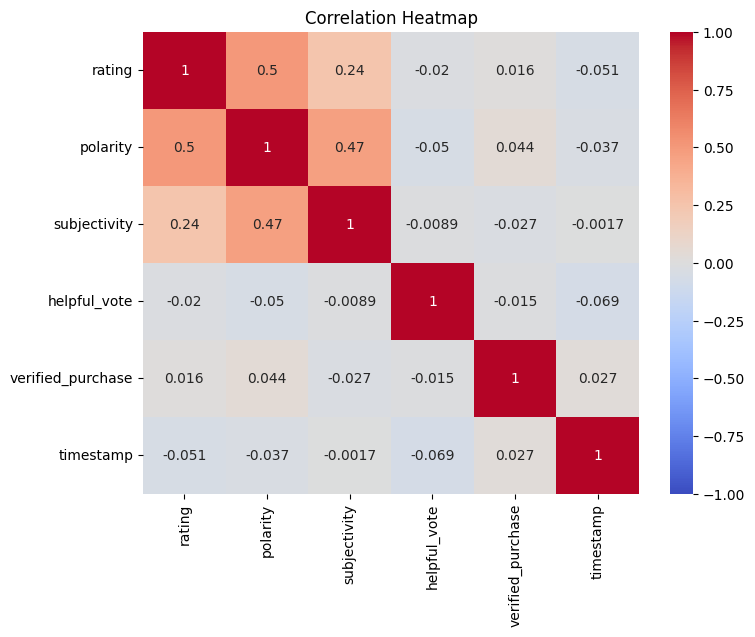

In [21]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
# Convert datetime to Unix timestamp
df['unix_timestamp'] = df['timestamp'].view('int64') / 10**9
  # Convert to seconds

# Calculate correlations
correlation_matrix = df[['rating', 'polarity', 'subjectivity', 'helpful_vote','verified_purchase','timestamp']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


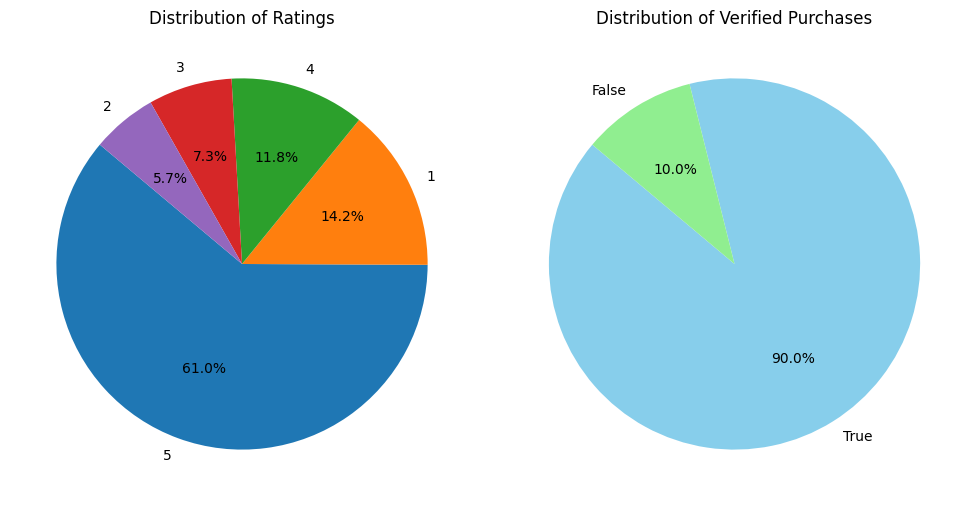

In [22]:


# Calculate counts for ratings
rating_counts = df['rating'].value_counts()

# Calculate counts for verified purchases
verified_counts = df['verified_purchase'].value_counts()

# Plotting pie chart for ratings
plt.figure()
plt.subplot(1, 2, 1)
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')

# Plotting pie chart for verified purchases
plt.subplot(1, 2, 2)
plt.pie(verified_counts, labels=verified_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Verified Purchases')

plt.tight_layout()
plt.show()


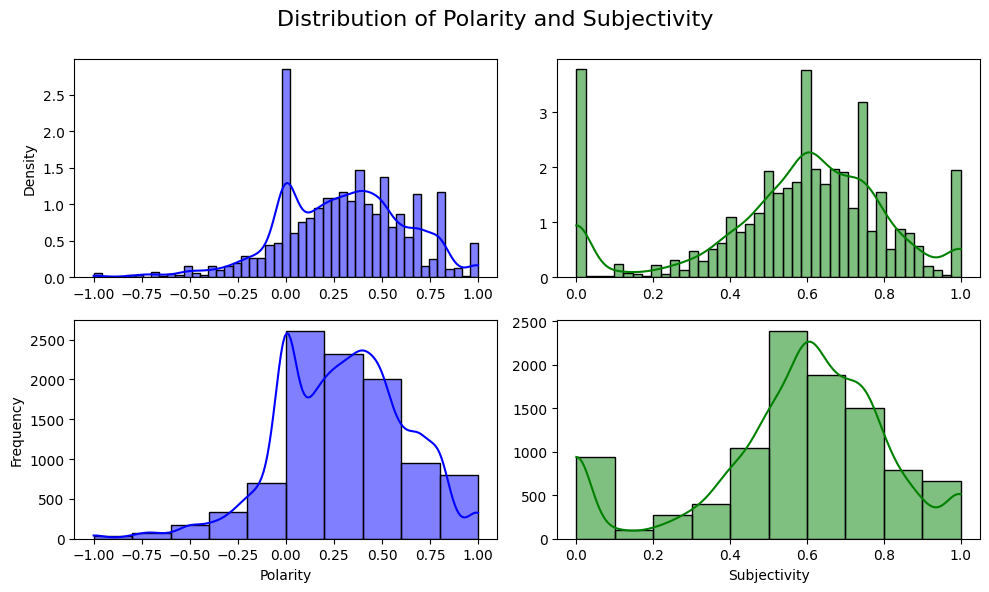

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 6)

# Create a figure and add a title for the whole figure
fig = plt.figure()
fig.suptitle('Distribution of Polarity and Subjectivity', fontsize=16)

# Polarity distribution plot (normalized)
plt.subplot(2, 2, 1)
sns.histplot(df['polarity'], kde=True, color='blue', linewidth=1, stat="density")
# plt.title('Distribution of Polarity (Normalized)')
plt.xlabel("")
plt.ylabel("Density")


# Subjectivity distribution plot (normalized)
plt.subplot(2, 2, 2)
sns.histplot(df['subjectivity'], kde=True, color='green', linewidth=1, stat="density")
# plt.title('Distribution of Subjectivity (Normalized)')
plt.xlabel("")
plt.ylabel("")


# Polarity distribution plot (frequency)
plt.subplot(2, 2, 3)
sns.histplot(df['polarity'], bins=10, kde=True, color='blue')
# plt.title('Distribution of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Subjectivity distribution plot (frequency)
plt.subplot(2, 2, 4)
sns.histplot(df['subjectivity'], bins=10, kde=True, color='green')
# plt.title('Distribution of Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('')

plt.tight_layout(rect=[0, 0, 1, .98])  
plt.show()


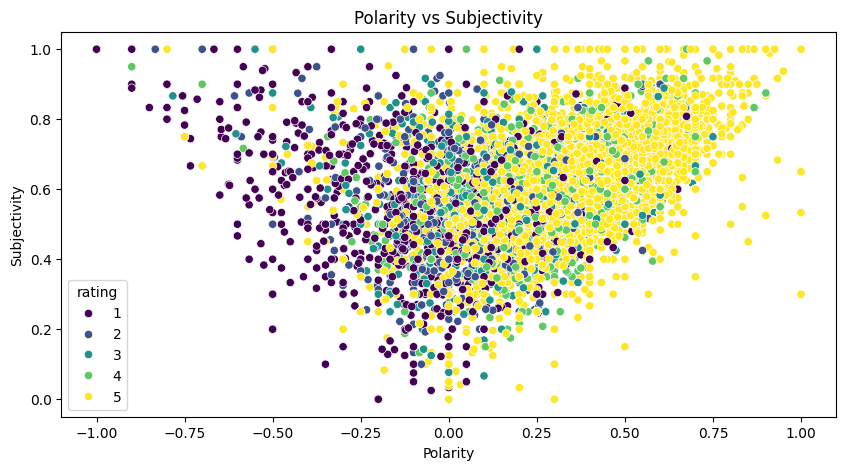

In [24]:


plt.rcParams['figure.figsize'] = (10, 5)

sns.scatterplot(x=df['polarity'], y=df['subjectivity'],hue=df['rating'], palette='viridis')
plt.title('Polarity vs Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


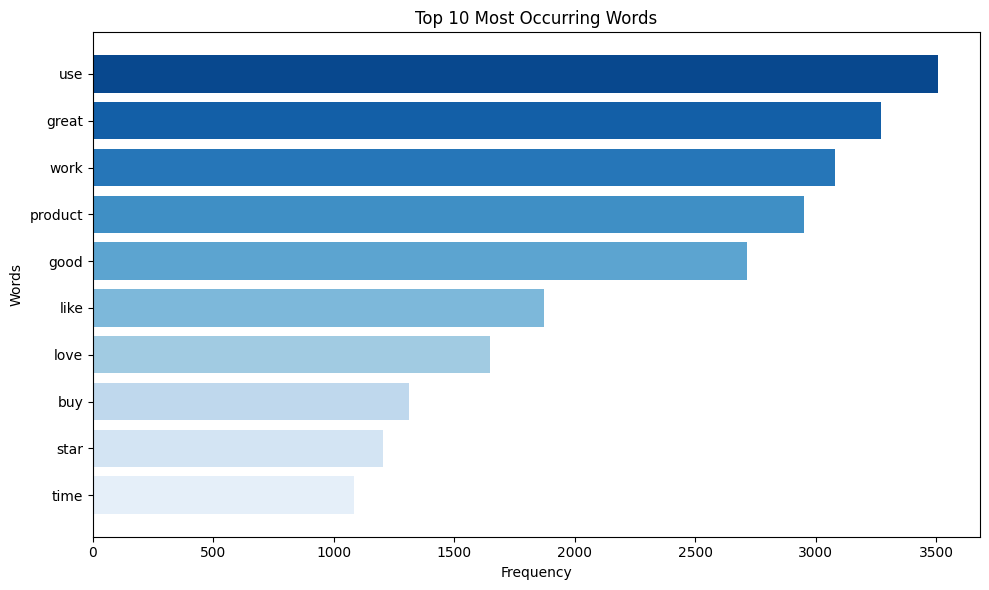

In [25]:

all_tokens = [tok for text in df['review'] if isinstance(text, str) for tok in text.split()]

# Calculate frequency distribution of words across all tokens
freq_dist = FreqDist(all_tokens)

# Get the 10 most common words and their frequencies
most_common = freq_dist.most_common(10)

# Extract words and frequencies
words, frequencies = zip(*most_common)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
palette = sns.color_palette('Blues_r', len(words)) 
plt.barh(words, frequencies, color=palette)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Occurring Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent word on top
plt.tight_layout()
plt.show()



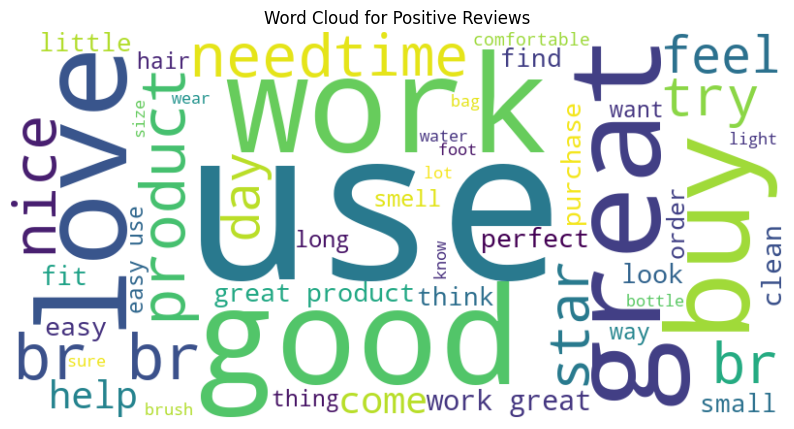

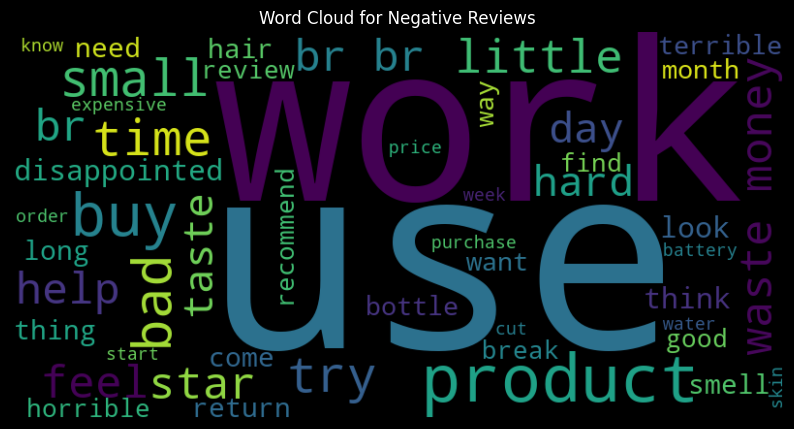

In [26]:

# Separate positive and negative reviews
positive_reviews = df[df['polarity'] > 0]['review'].tolist()
negative_reviews = df[df['polarity'] < 0]['review'].tolist()

# Function to generate and display word cloud
def generate_word_cloud(reviews, title,color="white",title_color="black"):
    wordcloud = WordCloud(width=800, height=400, background_color=color, max_words=50).generate(' '.join(reviews))
    plt.figure(figsize=(10, 6),facecolor=color)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title,color=title_color)

    plt.axis('off')
    plt.show()

# Generate word cloud for positive reviews
generate_word_cloud(positive_reviews, 'Word Cloud for Positive Reviews',)

# Generate word cloud for negative reviews
generate_word_cloud(negative_reviews, 'Word Cloud for Negative Reviews',"black","white")


In [27]:


# Sort data by timestamp if not already sorted
df = df.sort_values('timestamp')

# Extract timestamp and rating columns
timestamps = df['timestamp']
ratings = df['rating']


In [28]:


# Example data preparation (replace with your actual data)
# Assuming df is your DataFrame with 'timestamp' (datetime), 'rating', and 'verified_purchase' columns

# Extract year and month from timestamp
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month

# Separate data for verified and non-verified users
verified_data = df[df['verified_purchase'] == True]
not_verified_data = df[df['verified_purchase'] == False]

# Group by year and calculate average rating for each group
avg_rating_verified = verified_data.groupby('year')['rating'].mean().reset_index()
avg_rating_not_verified = not_verified_data.groupby('year')['rating'].mean().reset_index()
avg_rating_total = df.groupby('year')['rating'].mean().reset_index()

# Create traces for the yearly average ratings
trace_verified_year = go.Scatter(x=avg_rating_verified['year'], y=avg_rating_verified['rating'],
                                 mode='lines+markers', name='Verified Users')
trace_not_verified_year = go.Scatter(x=avg_rating_not_verified['year'], y=avg_rating_not_verified['rating'],
                                     mode='lines+markers', name='Not Verified Users')
trace_total_year = go.Scatter(x=avg_rating_total['year'], y=avg_rating_total['rating'],
                              mode='lines+markers', name='Total Average Rating', line=dict(dash='dash'))

# Generate a list of dropdown buttons for each month
dropdown_buttons = []

# Add "All" option
dropdown_buttons.append(dict(
    args=[{'visible': [True, True, True]}],
    label='All',
    method='update'
))

# Add buttons for each month
for month in range(1, 13):
    month_label = pd.to_datetime(month, format='%m').strftime('%B')  # Get month name
    month_data = df[df['month'] == month]
    
    avg_rating_verified_month = month_data[month_data['verified_purchase'] == True].groupby('year')['rating'].mean().reset_index()
    avg_rating_not_verified_month = month_data[month_data['verified_purchase'] == False].groupby('year')['rating'].mean().reset_index()
    avg_rating_total_month = month_data.groupby('year')['rating'].mean().reset_index()

    trace_verified_month = go.Scatter(x=avg_rating_verified_month['year'], y=avg_rating_verified_month['rating'],
                                      mode='lines+markers', name='Verified Users')
    trace_not_verified_month = go.Scatter(x=avg_rating_not_verified_month['year'], y=avg_rating_not_verified_month['rating'],
                                          mode='lines+markers', name='Not Verified Users')
    trace_total_month = go.Scatter(x=avg_rating_total_month['year'], y=avg_rating_total_month['rating'],
                                   mode='lines+markers', name='Total Average Rating', line=dict(dash='dash'))

    dropdown_buttons.append(dict(
        args=[{
            'visible': [False, False, False] + [True] * 3 + [False] * (12 * 3 - 3),
            'x': [trace_verified_month.x, trace_not_verified_month.x, trace_total_month.x],
            'y': [trace_verified_month.y, trace_not_verified_month.y, trace_total_month.y]
        }],
        label=month_label,
        method='update'
    ))

# Create layout for the plot with dropdown for month selection
layout = go.Layout(
    title='Average Rating Over Years by Verification Status',
    xaxis_title='Year',
    yaxis_title='Average Rating',
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.35,
        'xanchor': 'left',
        'y': 1.2,
        'yanchor': 'top'
    }]
)

# Create figure and add traces to it
fig = go.Figure(data=[trace_verified_year, trace_not_verified_year, trace_total_year], layout=layout)

# Add traces for each month but make them initially invisible
for button in dropdown_buttons[1:]:
    fig.add_trace(go.Scatter(x=button['args'][0]['x'][0], y=button['args'][0]['y'][0],
                             mode='lines+markers', visible=False, name='Verified Users'))
    fig.add_trace(go.Scatter(x=button['args'][0]['x'][1], y=button['args'][0]['y'][1],
                             mode='lines+markers', visible=False, name='Not Verified Users'))
    fig.add_trace(go.Scatter(x=button['args'][0]['x'][2], y=button['args'][0]['y'][2],
                             mode='lines+markers', visible=False, name='Total Average Rating', line=dict(dash='dash')))

# Show interactive plot
fig.show()
